# Project Title: "Customer Segmentation and Personality Analysis for Targeted Marketing Strategies

### Objective

Customer Personality Analysis is a detailed analysis of a company’s ideal
customers. It helps a business to better understand its customers and makes it
easier for them to modify products according to the specific needs, behaviors and
concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its
target customers from different types of customer segments. For example, instead
of spending money to market a new product to every customer in the company’s
database, a company can analyze which customer segment is most likely to buy
the product and then market the product only on that particular segment.

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv('marketing_campaign.csv')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

### Converting Categorical columns

In [74]:
df['Education']=df['Education'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['year'] = df['Dt_Customer'].dt.year
df['month'] = df['Dt_Customer'].dt.month
df['day'] = df['Dt_Customer'].dt.day
df['day_of_week'] = df['Dt_Customer'].dt.dayofweek 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [27]:
# Counts of missing values
df.isnull().sum()  

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Replace missing income values with the avaerage income value

In [56]:
df['Income'].mean().round(decimals=0)

52247.0

In [57]:
df['Income'].fillna(df['Income'].mean().round(decimals=0),inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [59]:
df.describe()[['Income']].T[['mean','max','min']]

mean       max     min
Income  52247.248661  666666.0  1730.0

In [144]:
df.groupby('Education').agg(Mean_Income=('Income','mean')).sort_values('Mean_Income',ascending=False)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Age  year  \
0            0  2012-09-04       58       635  ...         1   67  2012   
1            1  2014-03-08       38        11  ...         0   70  2014   
2            0  2013-08-21       26       426  ...         0   59  2013   
3            0  2014-02-10       26        11  ...         0   40  2014   
4            0  2014-01-19       94       173  ...         0   43  2014   
...        ...         ...      ...       ...  ...       ...  ...   ...   
2235         1  2013-06-13       46       709  ...         0   57  2013   
2236         1  2014-06-10       56       406  ...         0   78  2014   
2237         0  2014-01-25       91       908  ...         0   43  2014   
2238         1  2014-01-24        8       428  ...         0   68  2014   
2239         1  2012-10-15       40        84  ...         1   70  2012   

      month  day  day_of_week  Age_Group  Total_Online_Purchases  \
0         9    4            1   (60, 70]                      18   
1         3    8            5   (60, 70]                       2   
2         8   21            2   (50, 60]                      10   
3         2   10            0   (30, 40]                       2   
4         1   19            6   (40, 50]                       8   
...     ...  ...          ...        ...                     ...   
2235      6   13            3   (50, 60]                      12   
2236      6   10            1   (70, 80]                      10   
2237      1   25            5   (40, 50]                       5   
2238      1   24            4   (60, 70]                      11   
2239     10   15            0   (60, 70]                       4   

      Total_Store_Purchases  Total_Accepted_Cmp  
0                         4                   0  
1                         2                   0  
2                        10                   0  
3                         4                   0  
4                         6                   0  
...                     ...                 ...  
2235                      4                   0  
2236                      5                   1  
2237                     13                   1  
2238                     10                   0  
2239                      4                   0  

[2240 rows x 38 columns]

In [63]:
# Creating a new column Age to compute the age of samples
df['Age']=2024-df['Year_Birth']
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...             0   
1            1  08-03-2014       38        11  ...             0   
2            0  21-08-2013       26       426  ...             0   
3            0  10-02-2014       26        11  ...             0   
4            0  19-01-2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  13-06-2013       46       709  ...             0   
2236         1  10-06-2014       56       406  ...             0   
2237         0  25-01-2014       91       908  ...             0   
2238         1  24-01-2014        8       428  ...             0   
2239         1  15-10-2012       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Age  
0                 3         11         1   67  
1                 3         11         0   70  
2                 3         11         0   59  
3                 3         11         0   40  
4                 3         11         0   43  
...             ...        ...       ...  ...  
2235              3         11         0   57  
2236              3         11         0   78  
2237              3         11         0   43  
2238              3         11         0   68  
2239              3         11         1   70  

[2240 rows x 30 columns]

### removing outliers

In [51]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Data Visualization

<Axes: xlabel='Income', ylabel='Density'>

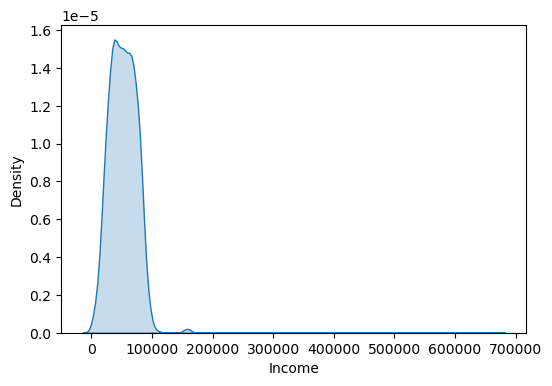

In [125]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Income'],fill=True)

<Axes: xlabel='Age', ylabel='Count'>

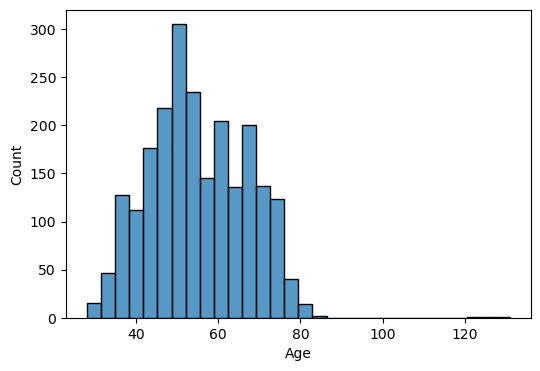

In [139]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'],bins=30)

### check maritial status of customers

<Axes: xlabel='Marital_Status', ylabel='Income'>

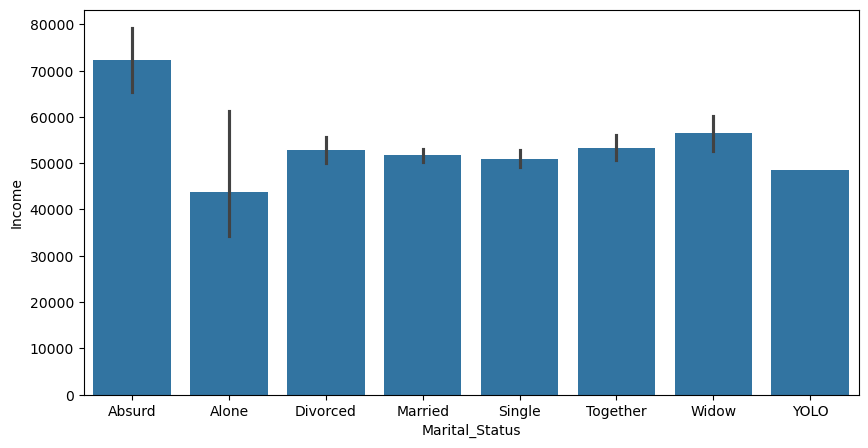

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(df,x='Marital_Status',y='Income')

<Axes: xlabel='Marital_Status'>

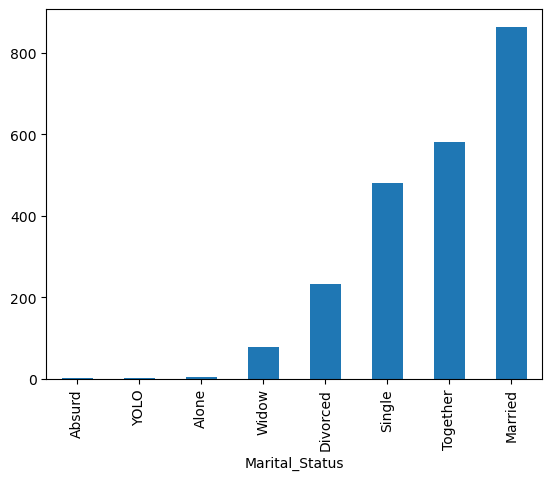

In [67]:
df['Marital_Status'].value_counts(ascending=True).plot(kind='bar')

### Education Ratio of customers

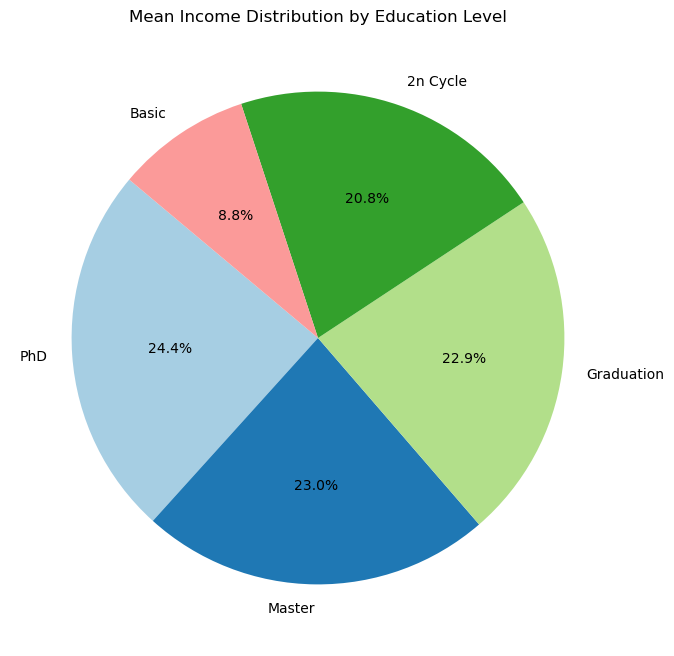

In [150]:
plt.figure(figsize=(8, 8))
plt.pie(income_by_education['Mean_Income'], labels=income_by_education.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Mean Income Distribution by Education Level')
plt.show()

In [149]:
# Grouping and calculating mean income by education level
income_by_education = df.groupby('Education').agg(Mean_Income=('Income','mean')).sort_values('Mean_Income', ascending=False)
income_by_education

Mean_Income
Education               
PhD         56105.207819
Master      52908.472973
Graduation  52715.753327
2n Cycle    47701.374384
Basic       20306.259259

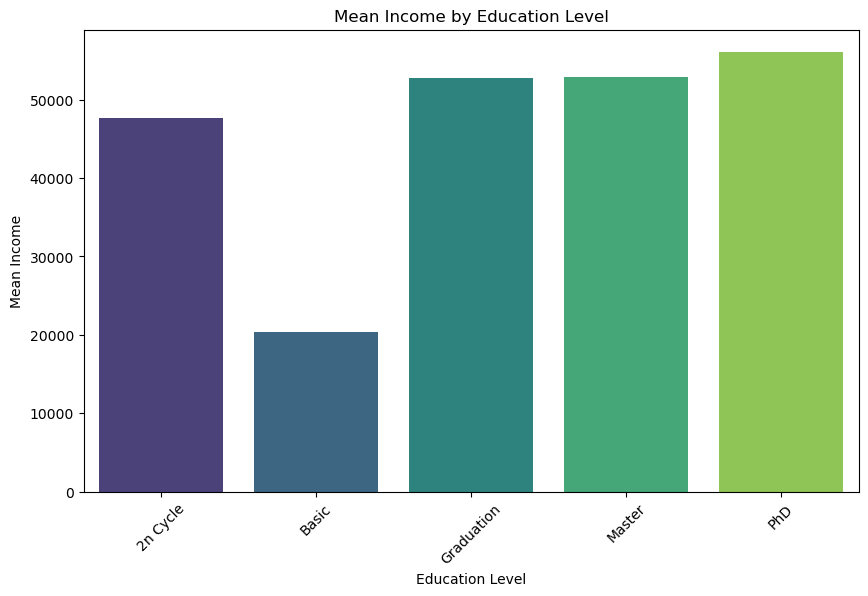

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Mean_Income', data=income_by_education, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Mean Income')
plt.title('Mean Income by Education Level')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Together'),
  Text(2, 0, 'Married'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'Alone'),
  Text(6, 0, 'Absurd'),
  Text(7, 0, 'YOLO')])

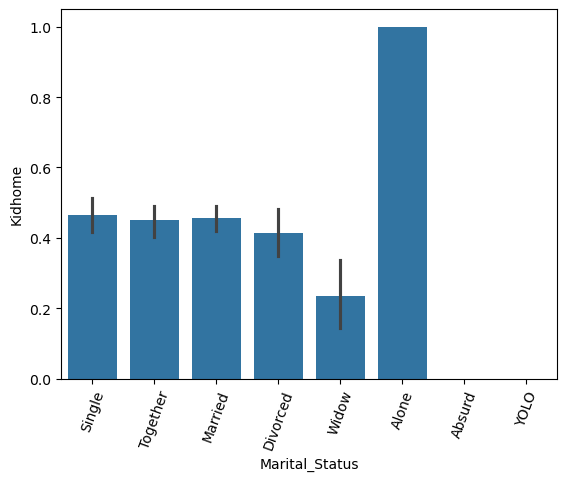

In [69]:
sns.barplot(df,x='Marital_Status',y='Kidhome')
plt.xticks(rotation=70)

### Age Vs Income

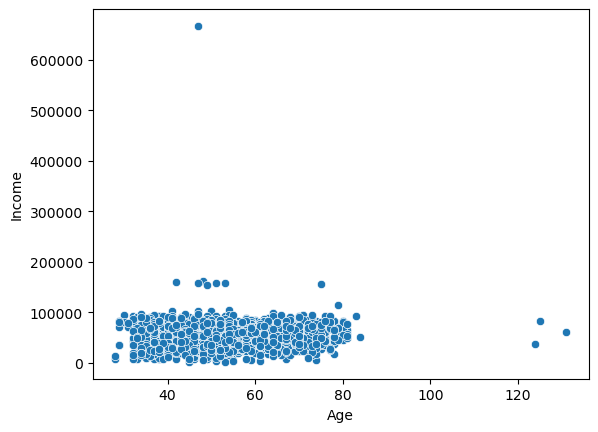

In [70]:
sns.scatterplot(df,x='Age',y='Income')
plt.show()

### distribution of customer education level

In [78]:
education_level_distribution = df['Education'].value_counts()
education_level_distribution

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

### What is the age distribution of customers?

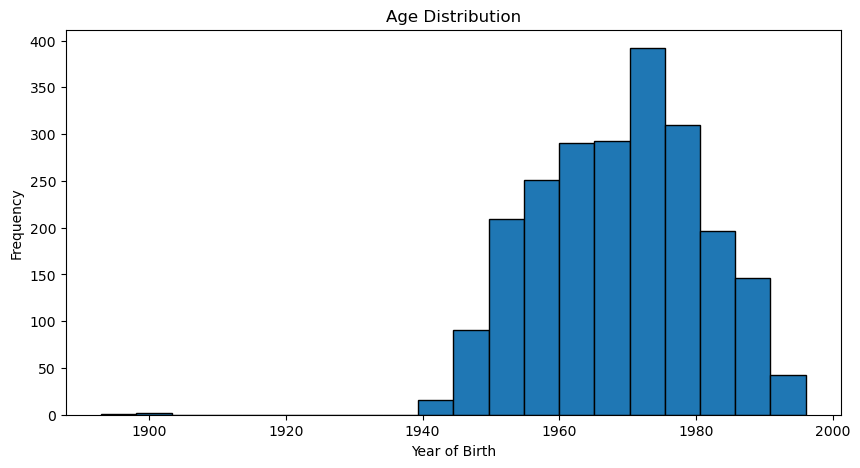

In [134]:
plt.figure(figsize=(10,5))
df['Year_Birth'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

### What is the average annual income of customers?

In [80]:
average_income = df['Income'].mean()
print(f'Average Income: {average_income}')

Average Income: 52247.248660714286


### What are the most frequently purchased products (wine, fruits, meat products, etc.)?

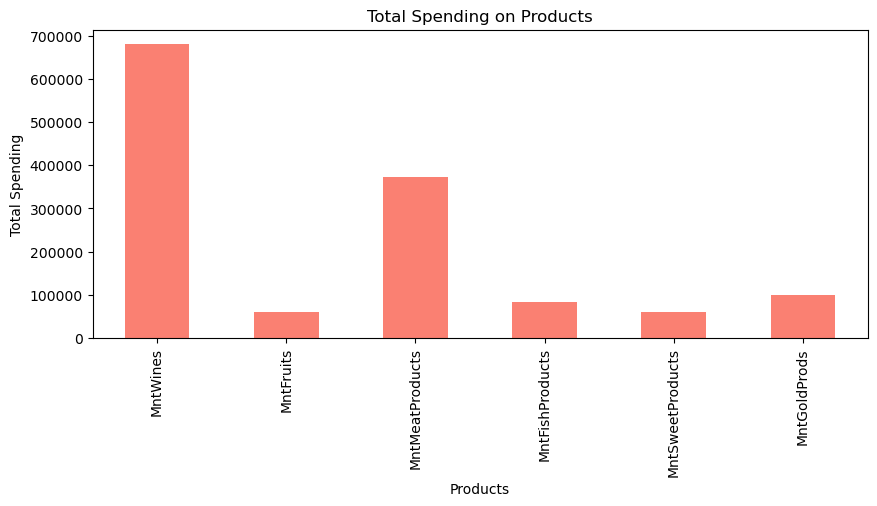

In [130]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = df[products].sum()
plt.figure(figsize=(10,4))
total_spent.plot(kind='bar', color='salmon')
plt.title('Total Spending on Products')
plt.xlabel('Products')
plt.ylabel('Total Spending')
plt.show()

### How does the rate of spending on products differ between different age groups?

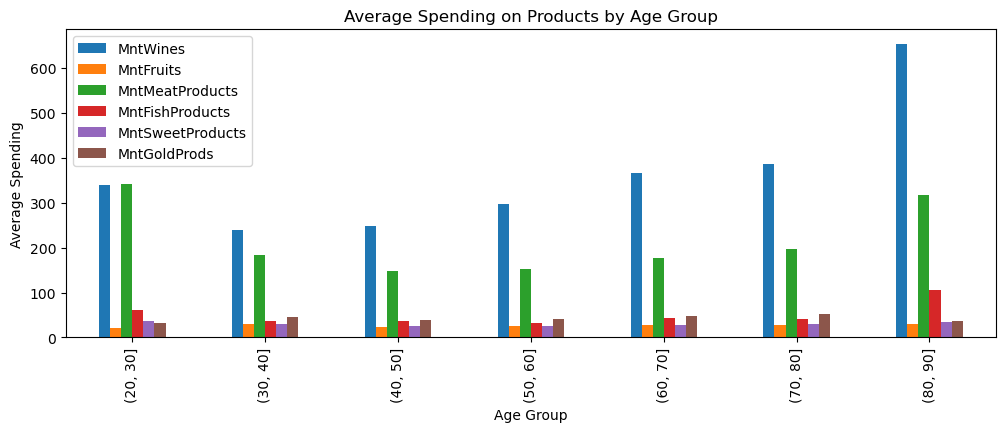

In [119]:
df['Age'] = 2024 - df['Year_Birth']
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins)

spending_by_age = df.groupby('Age_Group')[products].mean()
spending_by_age.plot(kind='bar', figsize=(12,4))
plt.title('Average Spending on Products by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

### Is there a difference in spending rate between married and single customers? 

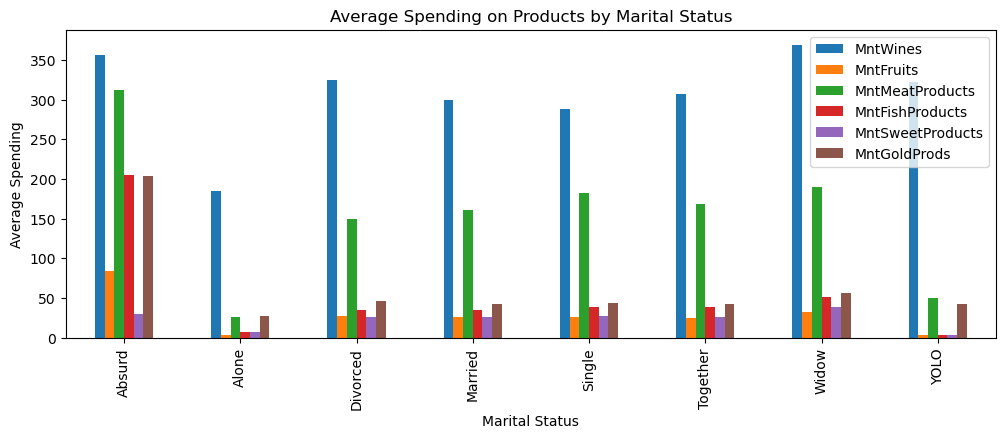

In [121]:
spending_by_marital_status = df.groupby('Marital_Status')[products].mean()
spending_by_marital_status.plot(kind='bar', figsize=(12,4))
plt.title('Average Spending on Products by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.show()

### Is the rate of purchasing online different from purchasing in stores?

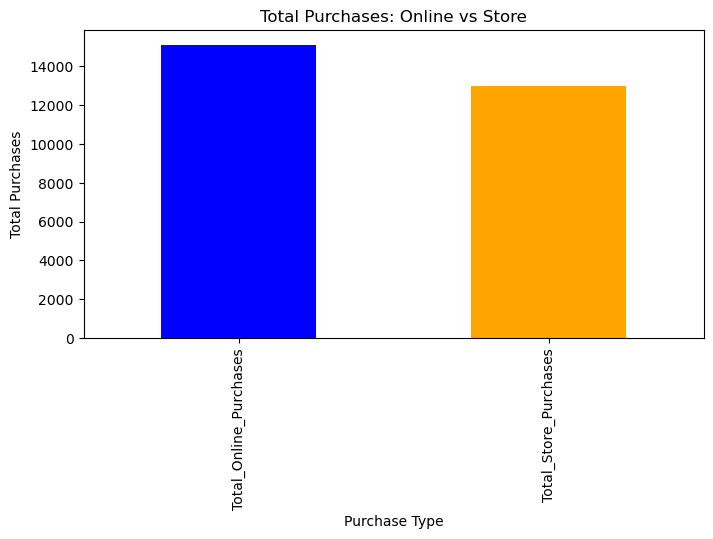

In [122]:
df['Total_Online_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df['Total_Store_Purchases'] = df['NumStorePurchases']

online_vs_store = df[['Total_Online_Purchases', 'Total_Store_Purchases']].sum()
plt.figure(figsize=(8,4))
online_vs_store.plot(kind='bar', color=['blue', 'orange'])
plt.title('Total Purchases: Online vs Store')
plt.xlabel('Purchase Type')
plt.ylabel('Total Purchases')
plt.show()

### Is there a relationship between a customer's income and the number of online purchases?

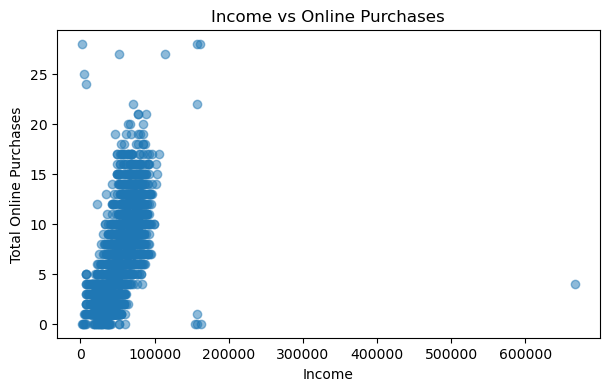

In [105]:
plt.figure(figsize=(7,4))
plt.scatter(df['Income'], df['Total_Online_Purchases'], alpha=0.5)
plt.title('Income vs Online Purchases')
plt.xlabel('Income')
plt.ylabel('Total Online Purchases')
plt.show()

### What is the relationship between age and the number of monthly visits to the site?

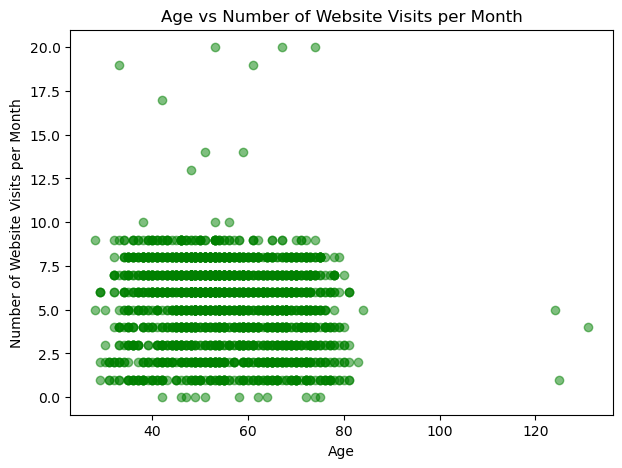

In [102]:
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['NumWebVisitsMonth'], alpha=0.5, color='green')
plt.title('Age vs Number of Website Visits per Month')
plt.xlabel('Age')
plt.ylabel('Number of Website Visits per Month')
plt.show()

### What factors affect customer acceptance of promotional offers? .

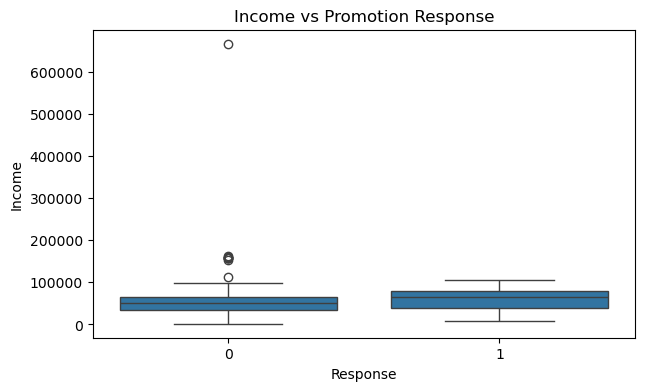

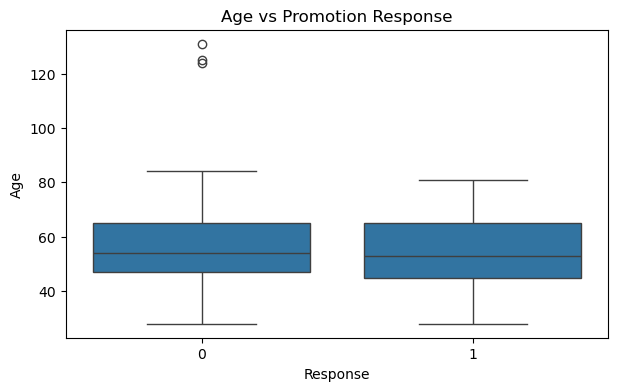

In [98]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Income vs Promotion Response')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Promotion Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

### What factors affect customer complaints?

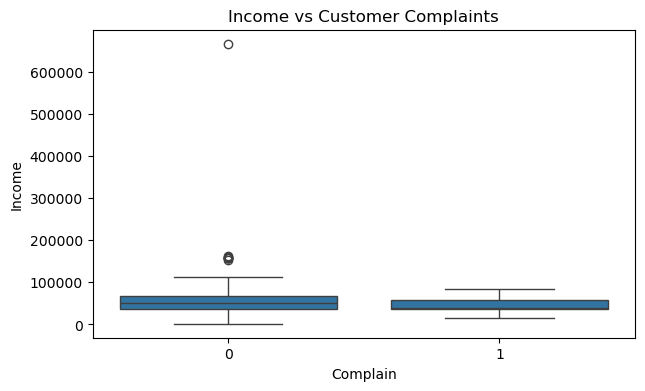

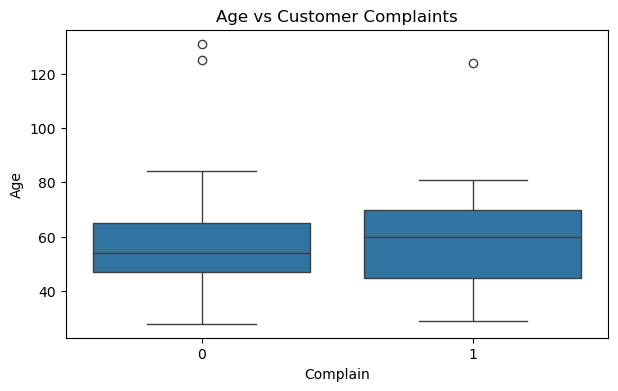

In [92]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Complain', y='Income', data=df)
plt.title('Income vs Customer Complaints')
plt.xlabel('Complain')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(x='Complain', y='Age', data=df)
plt.title('Age vs Customer Complaints')
plt.xlabel('Complain')
plt.ylabel('Age')
plt.show()

### What is the promotion acceptance rate (cmp) for each age group?

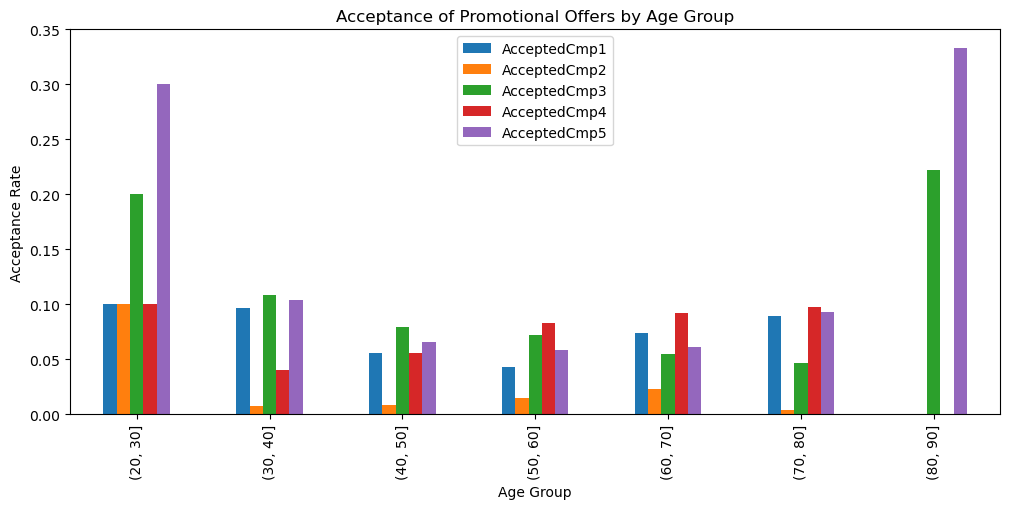

In [116]:
response_by_age_group = df.groupby('Age_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()
response_by_age_group.plot(kind='bar', figsize=(12,5))
plt.title('Acceptance of Promotional Offers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

### Is there a relationship between complaints and acceptance of promotions

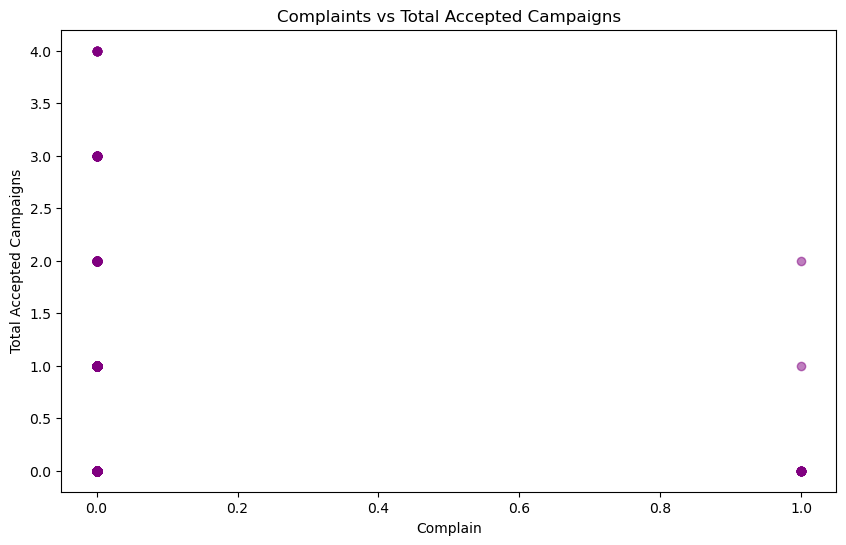

In [97]:
acceptance_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Accepted_Cmp'] = df[acceptance_columns].sum(axis=1)

plt.figure(figsize=(10,6))
plt.scatter(df['Complain'], df['Total_Accepted_Cmp'], alpha=0.5, color='purple')
plt.title('Complaints vs Total Accepted Campaigns')
plt.xlabel('Complain')
plt.ylabel('Total Accepted Campaigns')
plt.show()

# Insights:

1. **Income Insight**:
   
   Most individuals in the dataset have a gross income below 100,000 USD, indicating that the majority of customers fall into a lower to mid-income bracket.

3. **Marital Status Insight**:
   
   Married individuals make up the largest portion of the dataset, suggesting they are the primary customer demographic.

4. **Income by Marital Category**:
   
    If "Absurd" was meant to reflect a specific category, ensure it's accurately defined. Typically, widowed individuals having a higher income could indicate this group's financial stability or retirement benefits. Rephrase for clarity: "Widowed individuals show a higher mean income than other marital categories, which may reflect greater financial stability in this segment.

6. **Mean Income Insight**:
   
   The mean household income is approximately 52,247 USD, providing a benchmark for the dataset’s average customer income.


### **Project Summary: Customer Segmentation Analysis**

This customer segmentation analysis identifies and characterizes different customer groups based on demographic, behavioral, and spending data. The study provides actionable insights to help tailor marketing and engagement strategies for distinct customer segments, ultimately aiming to increase customer satisfaction, loyalty, and revenue.

Key findings include distinct clusters of customers based on age, income, and spending preferences. Higher-income customers tend to spend more on premium products, while lower-income segments respond well to discount-driven campaigns. Analysis of purchase channels shows that online shopping is popular among digitally engaged customers, while other segments still prefer in-store or catalog purchases. Recency and tenure metrics indicate which customers are highly engaged and likely to make repeat purchases, highlighting opportunities for targeted loyalty programs.

### **Recommendations**:
1. **Personalized Marketing**: Tailor promotions and communications based on each segment’s spending habits, product preferences, and responsiveness to discounts.
2. **Channel Strategy**: Focus marketing efforts on preferred channels to increase engagement with specific customer groups.
3. **Loyalty Initiatives**: Reward loyal customers and offer incentives to newer customers to enhance long-term relationships.

This segmentation approach enables the company to maximize marketing efficiency and better meet customer needs by aligning resources and strategies with each group’s preferences and behaviors.